# Process sentinel-2 images
This file is used to:
<ul>
<li>Find the UTM co-ordinates for the AOI for different coastline locations</li>
<li>Save stacked spectral bands cropped to the AOI, resampled to 5m</li>
<li>Save an RGB version of the spectral bands for annotation purposes</li>
<li>Add vegetation line annotations to the stack spectral bands file</li>
</ul>

To update: 
<ul>
<li>Include only one beach per AOI</li>
<li>Add ID</li>
<li>Do not include indices</li>
</ul>


In [1]:
import os
import glob
import numpy as np
import pandas as pd

import rasterio


import matplotlib.pyplot as plt
import cv2

# reimport 
import utils 
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/src/utils.py'>

## Step 1: Find geolocations for AOI

In [2]:
# Dictionary to store UTM coordinates for AOI
geolocations = {}

### Loaction: Howth, Co. Dublin, Ireland

In [3]:
file_name = "S2C_MSIL2A_20250330T114411_N0511_R123_T29UPV_20250330T163015"
safe_folder = f"howth/{file_name}.SAFE"
safe_directory = os.path.join("../data/raw/", safe_folder)

stacked_bands, meta_data  = utils.stack_10m_bands(safe_directory)
print(stacked_bands.shape)
print(meta_data.profile)

(4, 10980, 10980)
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 29N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32629"]]'), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 6000000.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


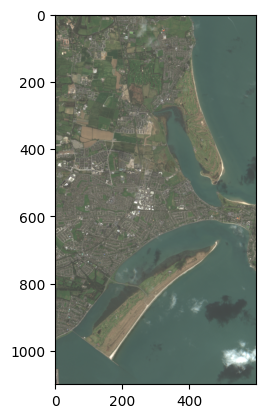

In [4]:
rgb = utils.get_rgb(stacked_bands,r=2,contrast=0.4)

x1 = 8700
y1 = 7450
x2 = 9300
y2 = 8550

crop_rgb = rgb[y1:y2,x1:x2]
plt.imshow(rgb)
#add rectangle
rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.imshow(crop_rgb)

In [25]:
# Get geolocations for AOI
left, top = meta_data.xy(y1,x1)
right, bottom = meta_data.xy(y2,x2)

# Save geolocations
geolocations["howth"] = {
    "left": left,
    "top": top,
    "right": right,
    "bottom": bottom
}

print(geolocations["howth"])
print(meta_data.index(left, top))
print(meta_data.index(right, bottom))

{'left': np.float64(687005.0), 'top': np.float64(5925495.0), 'right': np.float64(693005.0), 'bottom': np.float64(5914495.0)}
(7450, 8700)
(8550, 9300)


### Location: Tramore, Co. Waterford, Ireland

In [27]:
# Load the data
file_name = "S2A_MSIL2A_20250319T113331_N0511_R080_T29UPT_20250319T162057"
safe_folder = f"tramore/{file_name}.SAFE"
safe_directory = os.path.join("../data/raw/", safe_folder)

stacked_bands, meta_data  = utils.stack_10m_bands(safe_directory)
print(stacked_bands.shape)
print(meta_data.profile)

(4, 10980, 10980)
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 29N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32629"]]'), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 5800020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


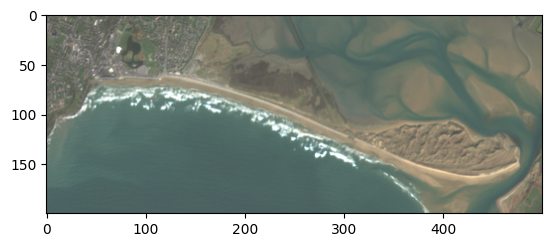

In [28]:
# Find AOI 
rgb = utils.get_rgb(stacked_bands,r=2,contrast=0.4)

x1 = 2600
y1 = 1900
x2 = 3100
y2 = 2100

crop_rgb = rgb[y1:y2,x1:x2]
plt.imshow(crop_rgb)

In [29]:
# Get geolocations for AOI
left, top = meta_data.xy(y1,x1)
right, bottom = meta_data.xy(y2,x2)

# Save geolocations
geolocations["tramore"] = {
    "left": left,
    "top": top,
    "right": right,
    "bottom": bottom
}

print(geolocations["tramore"])
print(meta_data.index(left, top))
print(meta_data.index(right, bottom))

{'left': np.float64(626005.0), 'top': np.float64(5781015.0), 'right': np.float64(631005.0), 'bottom': np.float64(5779015.0)}
(1900, 2600)
(2100, 3100)


In [30]:
# Save geolocations
np.save("../data/meta/geolocations.npy", geolocations)

## Step 2: crop all images to AOI

In [7]:
geolocations = np.load("../data/meta/geolocations.npy", allow_pickle=True).item()
print(geolocations)

{'tramore': {'left': np.float64(626005.0), 'top': np.float64(5781015.0), 'right': np.float64(631005.0), 'bottom': np.float64(5779015.0)}, 'howth': {'left': np.float64(687005.0), 'top': np.float64(5925495.0), 'right': np.float64(693005.0), 'bottom': np.float64(5914495.0)}}


In [15]:
# Get filenames for all locations
# These are the unique identifiers for the sentinel-2 images
locations = ["howth", "tramore"]
filenames = {}

for location in locations:
    # Get all .SAFE files in the directory
    safe_files = glob.glob(f"../data/raw/{location}/*.SAFE")
    print(f"{location}: {len(safe_files)}")

    base_names = [os.path.basename(f).split(".")[0] for f in safe_files]

    # Get the unique identifiers
    identifiers = [f.split("_")[2] for f in base_names]

    # sort base_names by identifiers in descending order
    sorted_indices = np.argsort(identifiers)[::-1]
    base_names = np.array(base_names)[sorted_indices]

    filenames[location] = base_names

print(filenames)
    

howth: 16
tramore: 0
{'howth': array(['S2A_MSIL2A_20240918T113321_N0511_R080_T29UPV_20240918T161547',
       'S2B_MSIL2A_20240916T114349_N0511_R123_T29UPV_20240916T171831',
       'S2B_MSIL2A_20240906T114349_N0511_R123_T29UPV_20240906T171818',
       'S2B_MSIL2A_20240814T113319_N0511_R080_T29UPV_20240814T130224',
       'S2A_MSIL2A_20240812T114351_N0511_R123_T29UPV_20240812T164902',
       'S2A_MSIL2A_20240723T114351_N0511_R123_T29UPV_20240723T164649',
       'S2B_MSIL2A_20240708T114349_N0510_R123_T29UPV_20240708T140048',
       'S2A_MSIL2A_20240623T114351_N0510_R123_T29UPV_20240623T164349',
       'S2B_MSIL2A_20240516T113319_N0510_R080_T29UPV_20240516T153656',
       'S2A_MSIL2A_20240421T113321_N0510_R080_T29UPV_20240421T171402',
       'S2A_MSIL2A_20160920T113312_N0500_R080_T29UPV_20231001T122017',
       'S2A_MSIL2A_20160824T114352_N0500_R123_T29UPV_20230930T145947',
       'S2A_MSIL2A_20160605T114352_N0500_R123_T29UPV_20231003T151024',
       'S2A_MSIL2A_20160602T113322_N0500_R080_

In [11]:
# reload utils
importlib.reload(utils)

processed_files = []
for aoi in ['howth','tramore']:

    # Use the same UTM coordinates for all images in the same AOI
    left = geolocations[aoi]["left"]
    top = geolocations[aoi]["top"]
    right = geolocations[aoi]["right"]
    bottom = geolocations[aoi]["bottom"]
    utm = (left, top, right, bottom)

    for filename in filenames[aoi]:
        safe_folder = f"{aoi}/{filename}.SAFE"
        safe_directory = os.path.join("../data/raw/", safe_folder)
    
        # Save AOI
        output_tif = f"../data/processed/aoi_crop/{filename}_AOI.tif"

        utils.stack_crop_resample_index(safe_directory, output_tif,
                                       resampling_factor=10, 
                                       utm=utm)

        date = filename.split("_")[2]
        date = date[:4] + "-" + date[4:6] + "-" + date[6:8]
        
        processed_files.append([filename, aoi, left, top, right, bottom, date])

Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2A_MSIL2A_20240918T113321_N0511_R080_T29UPV_20240918T161547_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2B_MSIL2A_20240916T114349_N0511_R123_T29UPV_20240916T171831_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2B_MSIL2A_20240906T114349_N0511_R123_T29UPV_20240906T171818_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2B_MSIL2A_20240814T113319_N0511_R080_T29UPV_20240814T130224_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2A_MSIL2A_20240812T114351_N0511_R123_T29UPV_20240812T164902_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2A_MSIL2A_20240723T114351_N0511_R123_T29UPV_20240723T164649_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2B_MSIL2A_20240708T114349_N0510_R123_T29UPV_20240708T140048_AOI.tif
Saved stacked Sentinel-2 bands to ../data/processed/aoi_crop/S2A_MSIL2A_20240623T114351_N0

In [12]:
# Save processed files metadata
processed_files = pd.DataFrame(processed_files, columns=["filename", "aoi", "left", "top", "right", "bottom", "date"])
processed_files.sort_values(by=["aoi","date"], inplace=True, ascending=False)
processed_files.to_csv("../data/meta/processed_files.csv", index=False)

# Load shape files

In [22]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "../data/QGIS/Vegetation Lines Howth/vegetation_lines_howth.shp"  # Update with actual path
gdf = gpd.read_file(shapefile_path)
# order by 'id' column
gdf.sort_values(by=["ID","line"], inplace=True)

# Display the first few rows
print(gdf)

                 ID  line                                           geometry
0   20150817T113146     1  LINESTRING (688613.967 5915251.057, 688615.534...
1   20150817T113146     2  LINESTRING (691349.718 5920811.498, 691331.695...
3   20150929T114422     1  LINESTRING (688621.534 5915249.025, 688585.488...
2   20150929T114422     2  LINESTRING (691338.674 5920810.249, 691327.704...
34  20160513T113322     1  LINESTRING (688613.335 5915252.555, 688607.852...
35  20160513T113322     2  LINESTRING (691345.494 5920826.527, 691349.606...
32  20160516T114402     1  LINESTRING (688631.61 5915253.926, 688621.102 ...
33  20160516T114402     2  LINESTRING (691339.098 5920802.312, 691328.133...
30  20160602T113322     1  LINESTRING (688624.3 5915249.357, 688616.533 5...
31  20160602T113322     2  LINESTRING (691354.175 5920837.949, 691364.227...
28  20160605T114352     1  LINESTRING (689243.034 5916165.407, 689259.481...
29  20160605T114352     2  LINESTRING (691349.949 5920813.277, 691338.984...

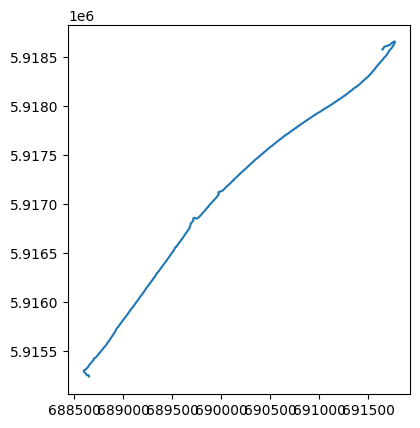

In [19]:
import matplotlib.pyplot as plt

gdf[gdf.ID=='20240916T114349'].plot()
plt.show()

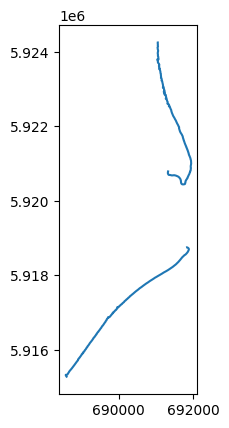

In [29]:
import matplotlib.pyplot as plt

gdf[gdf.ID=='20150929T114422'].plot()
plt.show()

## Step 3: Save RGB images

In [13]:
# Load processed files metadata
processed_files = pd.read_csv("../data/meta/processed_files.csv")
processed_files

,filename,aoi,left,top,right,bottom,date
0,S2A_MSIL2A_20240918T113321_N0511_R080_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-09-18
1,S2B_MSIL2A_20240916T114349_N0511_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-09-16
2,S2B_MSIL2A_20240906T114349_N0511_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-09-06
3,S2B_MSIL2A_20240814T113319_N0511_R080_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-08-14
4,S2A_MSIL2A_20240812T114351_N0511_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-08-12
5,S2A_MSIL2A_20240723T114351_N0511_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-07-23
6,S2B_MSIL2A_20240708T114349_N0510_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-07-08
7,S2A_MSIL2A_20240623T114351_N0510_R123_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-06-23
8,S2B_MSIL2A_20240516T113319_N0510_R080_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-05-16
9,S2A_MSIL2A_20240501T113321_N0510_R080_T29UPV_2...,howth,687005.0,5925495.0,693005.0,5914495.0,2024-05-01


In [14]:
importlib.reload(utils)

for filename in processed_files['filename']:

    # Load the aoi image
    aoi_path = f"../data/processed/aoi_crop/{filename}_AOI.tif"

    # load tif as image
    with rasterio.open(aoi_path) as src:
        all_bands = src.read()  # Reads all bands (Bands, Height, Width)

    rgb = utils.get_rgb(all_bands,r=2,contrast=0.4)

    # Save the image
    output_path = f"../data/processed/aoi_rgb/{filename}_RGB.png"
    cv2.imwrite(output_path, cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))

    print(f"Saved {output_path}")

Saved ../data/processed/aoi_rgb/S2A_MSIL2A_20240918T113321_N0511_R080_T29UPV_20240918T161547_RGB.png
Saved ../data/processed/aoi_rgb/S2B_MSIL2A_20240916T114349_N0511_R123_T29UPV_20240916T171831_RGB.png
Saved ../data/processed/aoi_rgb/S2B_MSIL2A_20240906T114349_N0511_R123_T29UPV_20240906T171818_RGB.png
Saved ../data/processed/aoi_rgb/S2B_MSIL2A_20240814T113319_N0511_R080_T29UPV_20240814T130224_RGB.png
Saved ../data/processed/aoi_rgb/S2A_MSIL2A_20240812T114351_N0511_R123_T29UPV_20240812T164902_RGB.png
Saved ../data/processed/aoi_rgb/S2A_MSIL2A_20240723T114351_N0511_R123_T29UPV_20240723T164649_RGB.png
Saved ../data/processed/aoi_rgb/S2B_MSIL2A_20240708T114349_N0510_R123_T29UPV_20240708T140048_RGB.png
Saved ../data/processed/aoi_rgb/S2A_MSIL2A_20240623T114351_N0510_R123_T29UPV_20240623T164349_RGB.png
Saved ../data/processed/aoi_rgb/S2B_MSIL2A_20240516T113319_N0510_R080_T29UPV_20240516T153656_RGB.png
Saved ../data/processed/aoi_rgb/S2A_MSIL2A_20240501T113321_N0510_R080_T29UPV_20240501T17175

## Step 4: Combine annotations and stacked bands


In [ ]:
crop_rgb_ = cv2.cvtColor(crop_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("test.png",crop_rgb_)

error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4>, cv::impl::(anonymous namespace)::Set<3, 4>, cv::impl::(anonymous namespace)::Set<0, 2, 5>>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


29
EPSG:2157
BoundingBox(left=660000.0, bottom=602000.0000000002, right=661000.0, top=603000.0000000002)
| 0.05, 0.00, 660000.00|
| 0.00,-0.05, 603000.00|
| 0.00, 0.00, 1.00|
(3, 20000, 20000)
-7.1229334743172075 52.166559413323355 -7.108137889422925 52.175437466975964


/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/SICS/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/SICS/lib/python3.11/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipyke

(np.float64(-0.5), np.float64(19999.5), np.float64(19999.5), np.float64(-0.5))

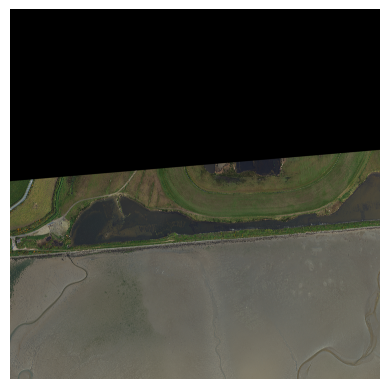

In [4]:
aeriel_folder = "../data/Tiles/50mm/"
tif_files = glob.glob(aeriel_folder + "*.tif")
print(len(tif_files))

i=1
#load first image
img = rasterio.open(tif_files[i])

# print metadata
print(img.crs)
bounds = img.bounds
print(bounds)
print(img.transform)

#utm to lat long
from pyproj import Proj, transform


img = img.read()
print(img.shape)

# print gps info
left= bounds[0]
bottom=bounds[1]
right=bounds[2]
top=bounds[3]

inProj = Proj(init='epsg:2157') # This is the crs for utm
outProj = Proj(init='epsg:4326') # This is the crs for lat long
left,bottom = transform(inProj,outProj,left,bottom)
right,top = transform(inProj,outProj,right,top)
print(left,bottom,right,top)


#display as rgb
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.axis("off")

#plt.savefig(f"aeriel_{i}.png",bbox_inches='tight', pad_inches=0)


(12, 10980, 10980)


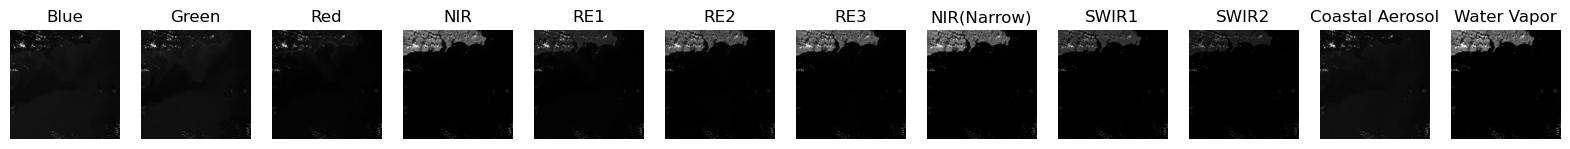

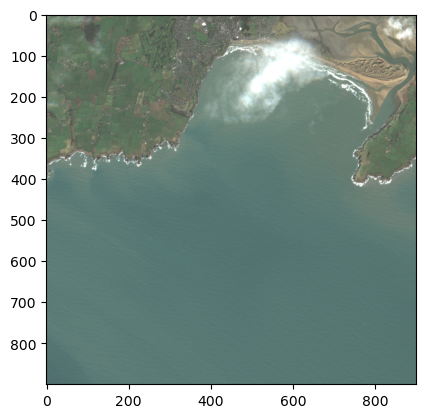

In [ ]:
rgb = get_rgb(stacked_bands,r=2,contrast=0.4)
#crop_rgb = rgb[3000:4000,1000:2000


crop_rgb = rgb[1900:2800,2200:3100]
#save image
#v2.imwrite("sentinel_rgb.png",crop_rgb)
plt.imshow(crop_rgb)

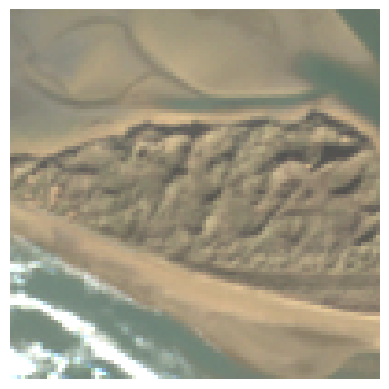

In [57]:
crop_rgb = rgb[1900:2800,2200:3100]
crop_rgb = crop_rgb[80:180,725:825]
#save image as rgb
plt.imshow(crop_rgb)
plt.axis("off")

plt.savefig("sentinel_rgb.png",bbox_inches='tight', pad_inches=0)

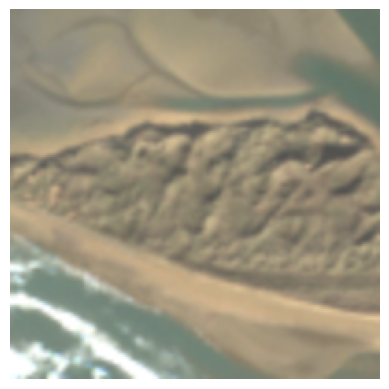

In [61]:
# upsample to 5m
crop_rgb = crop_rgb*255
crop_rgb = crop_rgb.astype(np.uint8)
crop_rgb = cv2.resize(crop_rgb, (crop_rgb.shape[1] * 2, crop_rgb.shape[0] * 2), interpolation=cv2.INTER_LINEAR)
plt.imshow(crop_rgb)
plt.axis("off")

plt.savefig("sentinel_rgb_5m.png",bbox_inches='tight', pad_inches=0)